# Convert EWX .json file to dataframe (or .csv)
Works with EWX .json files and converts to .csv's.

### Import libraries

In [8]:
%matplotlib notebook
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
import EWX_forecast as ewx
import json
import os
json_files = '/home/jupyter-engiela/la-tools-test/EWX_Forecast/json'
csv_files = '/home/jupyter-engiela/la-tools-test/EWX_Forecast/csv'
os.chdir(json_files)

# Parse Response Payload

In [2]:
filedf = ewx.sortdir(json_files, 5)

files found in dir:  /home/jupyter-engiela/la-tools-test/EWX_Forecast/json
                                              files                time
0  20190910142101115000_NEPOOL_MECO_7804345012.json 2019-09-10 19:58:36
1                        NEPOOL_MECO_4070532011.csv 2019-09-01 08:02:43
2                    CAP_NEPOOL_MECO_4070532011.csv 2019-09-01 08:02:43
3  20190815110200818000_NEPOOL_MECO_4070532011.json 2019-09-01 07:56:21
4                                          init.git 2019-08-30 20:16:39


In [3]:
files = filedf.files[[1]]
files

0    20190910142101115000_NEPOOL_MECO_7804345012.json
Name: files, dtype: object

### Parse & save to dataframe

In [9]:
for f in files:
    forecasts = ewx.json_parse_csv(f)    

loading json...
found  12 reads, creating dataset.
found  12 reads, creating dataset.
                     t         v
0  2019-01-01 00:00:00  5.680122
1  2019-01-01 01:00:00  5.383122
2  2019-01-01 02:00:00  5.308872
3  2019-01-01 03:00:00  5.680122
4  2019-01-01 04:00:00  5.828622
                         t         v
99307  2030-04-30 19:00:00  6.852824
99308  2030-04-30 20:00:00  6.635274
99309  2030-04-30 21:00:00  6.055141
99310  2030-04-30 22:00:00  5.765074
99311  2030-04-30 23:00:00  5.257457
saving to dataframe...
writing file to csv


### Plot data

<IPython.core.display.Javascript object>


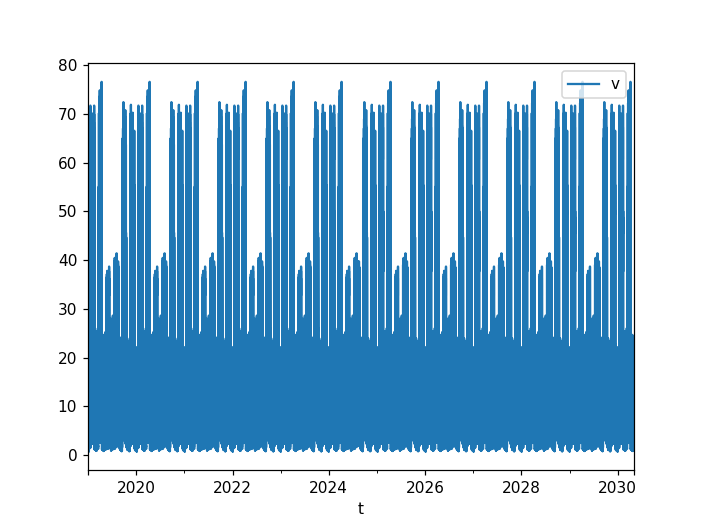

In [11]:
forecasts.plot(y = 'v')

<IPython.core.display.Javascript object>


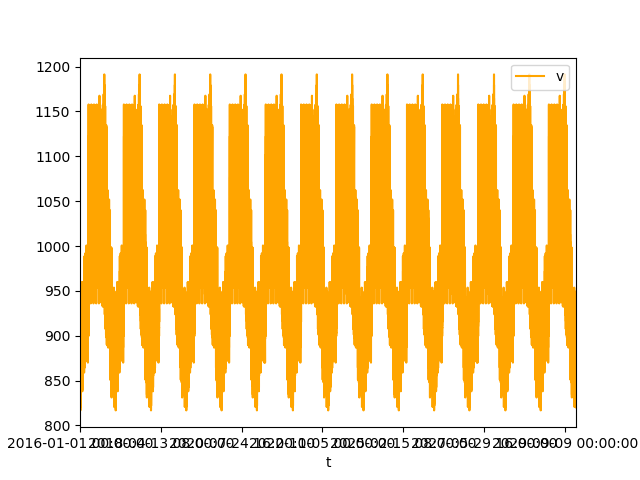

In [8]:
forecasts2.plot(x = 't', y = 'v', color = 'orange')

## Parse Response File

In [4]:
with open(file) as raw:
    print("loading json...")
    data = json.load(raw) #raw json file
    acct = data['account'] #get account data
    sca = acct['timeseriesdatascalar'] #scalar data
    ch3 = acct['timeseriesdataidr'] #dictionary of acct attributes
    n = len(ch3)
        
    filename = file.split('_')[1:]
    filename = '_'.join(filename)
    filename = filename.replace('.json', '.csv')
    print('file name: {}'.format(filename))
        
    reads = ch3[0]['reads']
    caps = pd.DataFrame.from_records(acct['captag'])
    g = ''.join(['CAP_', filename])
    caps.to_csv(g)
    master_df = pd.DataFrame.from_dict(reads)
    
    scalar = pd.DataFrame(sca)
    sname = ''.join(['SCA_', filename])
        
    print('found ', n, 'reads, creating dataset.')
        
    for i in range(1,n):
        reads = ch3[i]['reads']
        temp = pd.DataFrame.from_dict(reads)
        master_df = pd.concat([master_df, temp]).reset_index(drop = True)
        
    print(master_df.head())
    print(master_df.tail())
        
    
    print("saving to dataframe...")
    
    mastername = filename.split('.')[0]
    mastername = '_'.join([filename, 'master.json'])

    print('writing file to csv')
    idr = ''.join(['IDR_', filename])
    master_df.to_csv(idr, sep = ",", header = True, index = False)

NameError: name 'file' is not defined

In [20]:
caps

,start,stop,sv,v
0,2019-06-01 00:00:00,2020-05-31 23:59:59,H,245.422
1,2020-06-01 00:00:00,2021-05-31 23:59:59,S,245.422
2,2021-06-01 00:00:00,2031-05-31 23:59:59,S,245.422


# Parse Ingest Payload

In [ ]:
file = filedf.files[0]

with open(file) as raw:
    print("loading json...")
    data = json.load(raw) #raw json file
    acct = data['account'] #get account data
    idr = acct['timeseriesdataidr'] #dictionary of acct attributes

In [ ]:
reads = idr[0]['reads']
temp = pd.DataFrame.from_dict(reads)
temp['v'] = pd.to_numeric(temp['v'])
temp.plot(y = 'v')

In [ ]:
acct

### Read new IDR file

In [ ]:
new_idr = pd.read_csv(filedf.files[1])
new_idr['t'] = pd.to_datetime(new_idr['t'])
new_idr.plot(y = 'v', color = 'orange')

In [ ]:
new_idr['t'] = [str(t) for t in new_idr.t]
new_idr['v'] = [str(v) for v in new_idr.v]
json_df = new_idr.to_json(orient = 'records')
json_df = json.loads(json_df)

### Add IDR to IDR

In [ ]:
idr[0]['reads'] = json_df

### Add IDR to Scalar

In [ ]:
acct['timeseriesdataidr'] = []
idr.append(dict([('reads', json_df)]))
acct['timeseriesdataidr'] = idr

## Write new ingest json

In [ ]:
filedf.files[0]

In [ ]:
fp = os.path.join(filepath, filedf.files[0])
final_json = json.dumps(data)
with open(filedf.files[0], 'w') as f:
    f.write(final_json)